In [380]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [381]:
pd.set_option('precision', 2)
pd.set_option('max_rows', 300)
pd.options.display.float_format = '{:,.2f}'.format

In [382]:
base_loc = '/Users/rbekbolatov/tmp/Navi_compare/'

---

# contact_impression

#### Navi
```sql
select 'passed' as filter, 'navi' as system, event_date, contact_type, count(1) as cnt from rbekbolatov_src.weblog where event_date > '2015-09-24' and event_type = 'contact_impression' group by event_date, contact_type order by contact_type    

union all    

select 'blocked' as filter, 'navi' as system, event_date, contact_type, count(1) as cnt from rbekbolatov_src.weblog_blocked where event_date > '2015-09-24' and event_type = 'contact_impression' group by event_date, contact_type order by contact_type
```

#### Prod
```sql
select 'passed' as filter, 'prod' as system, event_date, contact_type, count(1) as cnt from src.weblog where event_date > '2015-09-24' and event_type = 'contact_impression' group by event_date, contact_type order by contact_type    

union all    

select 'blocked' as filter, 'prod' as system, event_date, contact_type, count(1) as cnt from  src.weblog_blocked where event_date > '2015-09-24' and event_type = 'contact_impression' group by event_date, contact_type order by contact_type
```

In [402]:
a = pd.DataFrame()
for i in ['navi', 'prod']:
    try:
        a = a.append(pd.read_csv(base_loc + 'ci_' + i + '.csv'), ignore_index=True)
    except:
        pass
    
a = a.rename(columns={col:col[4:] for col in a.columns})    

contacts = a.pivot_table('cnt', index=['event_date', 'contact_type'], columns=['system', 'filter'], fill_value=0)

contacts['navi', 'total'] = contacts['navi', 'blocked'] + contacts['navi', 'passed']
contacts['prod', 'total'] = contacts['prod', 'blocked'] + contacts['prod', 'passed']

contacts['change_abs', 'passed'] = contacts['navi', 'passed'] - contacts['prod', 'passed']
contacts['change_abs', 'blocked'] = contacts['navi', 'blocked'] - contacts['prod', 'blocked']
contacts['change_abs', 'total'] = contacts['navi', 'total'] - contacts['prod', 'total']

# contacts['change', 'passed'] = ["{0:.2f}%".format(val * 100)  for val in (contacts['change_abs', 'passed'] / contacts['prod', 'passed'])]
# contacts['change', 'blocked'] = ["{0:.2f}%".format(val * 100)  for val in (contacts['change_abs', 'blocked'] / contacts['prod', 'blocked'])]
# contacts['change', 'total'] = ["{0:.2f}%".format(val * 100)  for val in (contacts['change_abs', 'total'] / contacts['prod', 'total'])]

contacts['change', 'passed'] = contacts['change_abs', 'passed'] / contacts['prod', 'passed']
contacts['change', 'blocked'] = contacts['change_abs', 'blocked'] / contacts['prod', 'blocked']
contacts['change', 'total'] = contacts['change_abs', 'total'] / contacts['prod', 'total']

contacts = contacts.sort_index(axis=1, ascending=False)
contacts = contacts.sort_index(axis=0, ascending=True)

contact_impressions = contacts

contact_impressions.sort_index(inplace=True)
contact_impressions.to_html('contact_impression.html')

contact_impressions

system                    prod                  navi                 \
filter                   total passed blocked  total passed blocked   
event_date contact_type                                               
2015-09-25 email           726    707      19    859    821      38   
           phone          4546   4168     378   4546   4220     326   
           website        6368   6287      81   6296   6205      91   
2015-09-26 email           424    417       7    487    487       0   
           phone           898    850      48    898    880      18   
           website        3518   3452      66   3421   3404      17   
2015-09-27 email           451    451       0    548    546       2   
           phone           504    499       5    504    499       5   
           website        4089   3963     126   3960   3895      65   
2015-09-28 email          1263   1261       2   1489   1443      46   
           phone          6501   6301     200   6501   6364     137   
           website       10265  10170      95  10169  10024     145   
2015-09-29 email          1203   1202       1   1434   1428       6   
           phone          5988   5575     413   5988   5641     347   
           website       10310  10242      68  10286  10157     129   
2015-09-30 email          1164   1160       4   1374   1355      19   
           phone          5834   5361     473   5834   5432     402   
           website        9632   9575      57   9515   9360     155   
2015-10-01 email           888    887       1   1028   1022       6   
           phone          5365   5045     320   5365   5100     265   
           website        8749   8711      38   8563   8443     120   
2015-10-02 email           776    770       6    914    908       6   
           phone          5214   4888     326   5214   4913     301   
           website        7422   7336      86   7357   7282      75   
2015-10-03 email           526    526       0    595    595       0   
           phone          1071   1060      11   1071   1060      11   
           website        4766   4758       8   4768   4755      13   
2015-10-04 email           608    608       0    715    711       4   
           phone           615    610       5    615    610       5   
           website        5117   5096      21   5094   5061      33   
2015-10-05 email          1388   1388       0   1601   1599       2   
           phone          7633   7258     375   7633   7271     362   
           website       11585  11511      74  11532  11379     153   
2015-10-06 email          1328   1327       1   1568   1550      18   
           phone          6400   6187     213   6400   6201     199   
           website       11056  10962      94  10959  10827     132   
2015-10-07 email          1134   1131       3   1326   1318       8   
           phone          6258   6076     182   6258   6100     158   
           website       10738  10660      78  10651  10543     108   
2015-10-08 email          1115   1113       2   1259   1243      16   
           phone          5769   5662     107   5769   5681      88   
           website       10257  10217      40  10248  10149      99   
2015-10-09 email           931    929       2    945    945       0   
           phone          5366   5212     154   5366   5222     144   
           website        9393   9346      47   9542   9542       0   
2015-10-10 email           576    576       0    579    579       0   
           phone          1132   1110      22   1132   1112      20   
           website        5352   5321      31   5415   5415       0   
2015-10-11 email           604    604       0    609    609       0   
           phone           669    662       7    669    662       7   
           website        6232   6193      39   6293   6291       2   
2015-10-12 email          1182   1177       5   1211   1210       1   
           phone          6669   6533     136   6669   6552     117   
           website      

Percentage difference (Navi - Prod) in the number of contact_impression events with contact_type=phone
Percentage difference (Navi - Prod) in the number of contact_impression events with contact_type=email
Percentage difference (Navi - Prod) in the number of contact_impression events with contact_type=website


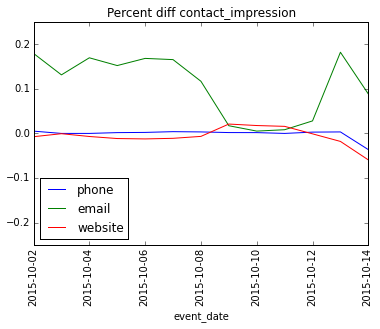

In [435]:

huy = contact_impressions.ix['2015-10-02':].swaplevel(0,1).sort().ix['phone'][[('prod', 'passed'), ('change', 'passed')]]
#huy[('prod', 'passed')].plot()
#huy[('change', 'passed')].plot(secondary_y=True)
print("Percentage difference (Navi - Prod) in the number of contact_impression events with contact_type=phone")
huy[('change', 'passed')].plot(ylim=[-0.05,0.05], title='Percent diff contact_impression, contact_type=phone', rot=90, y='# of events', label='phone', legend=True)


huy = contact_impressions.ix['2015-10-02':].swaplevel(0,1).sort().ix['email'][[('prod', 'passed'), ('change', 'passed')]]
#huy[('prod', 'passed')].plot()
#huy[('change', 'passed')].plot(secondary_y=True)
print("Percentage difference (Navi - Prod) in the number of contact_impression events with contact_type=email")
huy[('change', 'passed')].plot(ylim=[-0.25,0.25], title='Percent diff contact_impression, contact_type=phone', rot=90, y='# of events',  label='email', legend=True)


huy = contact_impressions.ix['2015-10-02':].swaplevel(0,1).sort().ix['website'][[('prod', 'passed'), ('change', 'passed')]]
#huy[('prod', 'passed')].plot()
#huy[('change', 'passed')].plot(secondary_y=True)
print("Percentage difference (Navi - Prod) in the number of contact_impression events with contact_type=website")
huy[('change', 'passed')].plot(ylim=[-0.25,0.25], title='Percent diff contact_impression', rot=90, y='# of events' , label='website', legend=True)


---

# event_type

#### Navi

```sql
select 'passed' as filter, 'navi' as system, event_date, event_type, count(1) as cnt from rbekbolatov_src.weblog where event_date > '2015-09-24' group by event_date, event_type order by event_type

union all

select 'blocked' as filter, 'navi' as system, event_date, event_type, count(1) as cnt from rbekbolatov_src.weblog_blocked where event_date > '2015-09-24' group by event_date, event_type order by event_type
```

#### Prod
```sql
select 'passed' as filter, 'prod' as system, event_date, event_type, count(1) as cnt from src.weblog where event_date > '2015-09-24' group by event_date, event_type order by event_type   

union all   

select 'blocked' as filter, 'prod' as system, event_date, event_type, count(1) as cnt from src.weblog_blocked where event_date > '2015-09-24' group by event_date, event_type order by event_type
```

In [ ]:
a = pd.DataFrame()
for i in ['navi', 'prod']:
    try:
        a = a.append(pd.read_csv(base_loc + 'et_' + i + '.csv'), ignore_index=True)
    except:
        pass
    
a = a.rename(columns={col:col[4:] for col in a.columns})    

contacts = a.pivot_table('cnt', index=['event_date', 'event_type'], columns=['system', 'filter'], fill_value=0)

contacts['navi', 'total'] = contacts['navi', 'blocked'] + contacts['navi', 'passed']
contacts['prod', 'total'] = contacts['prod', 'blocked'] + contacts['prod', 'passed']

contacts['change_abs', 'passed'] = contacts['navi', 'passed'] - contacts['prod', 'passed']
contacts['change_abs', 'blocked'] = contacts['navi', 'blocked'] - contacts['prod', 'blocked']
contacts['change_abs', 'total'] = contacts['navi', 'total'] - contacts['prod', 'total']

contacts['change', 'passed'] = ["{0:.2f}%".format(val * 100)  for val in (contacts['change_abs', 'passed'] / contacts['prod', 'passed'])]
contacts['change', 'blocked'] = ["{0:.2f}%".format(val * 100)  for val in (contacts['change_abs', 'blocked'] / contacts['prod', 'blocked'])]
contacts['change', 'total'] = ["{0:.2f}%".format(val * 100)  for val in (contacts['change_abs', 'total'] / contacts['prod', 'total'])]

contacts = contacts.sort_index(axis=1, ascending=False)
contacts = contacts.sort_index(axis=0, ascending=True)

events = contacts
events.to_html('event_type.html')

In [ ]:
events

---

# professional_impression

#### Navi
```sql
select 'passed' as filter, 'navi' as system, event_date, category, count(1) as cnt from rbekbolatov_src.weblog where event_date > '2015-09-24' and event_type = 'professional_impression' group by event_date, category order by category

union all

select 'blocked' as filter, 'navi' as system, event_date, category, count(1) as cnt from rbekbolatov_src.weblog_blocked where event_date > '2015-09-24' and event_type = 'professional_impression' group by event_date, category order by category
```

#### Prod
```sql
select 'passed' as filter, 'prod' as system, event_date, category, count(1) as cnt from src.weblog where event_date > '2015-09-24' and event_type = 'professional_impression' group by event_date, category order by category   

union all   

select 'blocked' as filter, 'prod' as system, event_date, category, count(1) as cnt from src.weblog_blocked where event_date > '2015-09-24' and event_type = 'professional_impression' group by event_date, category order by category
```

In [ ]:
a = pd.DataFrame()
for i in ['navi', 'prod']:
    try:
        a = a.append(pd.read_csv(base_loc + 'pi_' + i + '.csv'), ignore_index=True)
    except:
        pass
    
a = a.rename(columns={col:col[4:] for col in a.columns})  

contacts = a.pivot_table('cnt', index=['event_date', 'category'], columns=['system', 'filter'], fill_value=0)

contacts['navi', 'total'] = contacts['navi', 'blocked'] + contacts['navi', 'passed']
contacts['prod', 'total'] = contacts['prod', 'blocked'] + contacts['prod', 'passed']

contacts['change_abs', 'passed'] = contacts['navi', 'passed'] - contacts['prod', 'passed']
contacts['change_abs', 'blocked'] = contacts['navi', 'blocked'] - contacts['prod', 'blocked']
contacts['change_abs', 'total'] = contacts['navi', 'total'] - contacts['prod', 'total']

contacts['change', 'passed'] = ["{0:.2f}%".format(val * 100)  for val in (contacts['change_abs', 'passed'] / contacts['prod', 'passed'])]
contacts['change', 'blocked'] = ["{0:.2f}%".format(val * 100)  for val in (contacts['change_abs', 'blocked'] / contacts['prod', 'blocked'])]
contacts['change', 'total'] = ["{0:.2f}%".format(val * 100)  for val in (contacts['change_abs', 'total'] / contacts['prod', 'total'])]

contacts = contacts.sort_index(axis=1, ascending=False)
contacts = contacts.sort_index(axis=0, ascending=True)

professional_impressions = contacts

professional_impressions.reset_index(inplace=True)
professional_impressions.sort(columns=['event_date', ('prod', 'total')], ascending=(True, False), inplace=True)
professional_impressions.set_index(keys=['event_date', 'category'], inplace=True)

professional_impressions.to_html('professional_impression.html')

In [ ]:
professional_impressions

In [ ]:
page_type_navi = pd.read_csv(base_loc + 'pv_navi.csv', skiprows=1, names=['page_type', 'count'])
page_type_prod = pd.read_csv(base_loc + 'pv_prod.csv', skiprows=1, names=['page_type', 'count'])

page_type_counts = page_type_navi.merge(page_type_prod, on='page_type', suffixes=['_navi', '_prod'])

page_type_counts['change_abs'] = page_type_counts['count_navi'] - page_type_counts['count_prod']
page_type_counts['change'] = ["{0:.2f}%".format(val * 100)  for val in page_type_counts['change_abs'] / page_type_counts['count_prod']]

page_type_counts.sort(columns='page_type', inplace=True, ascending=True)

page_type_counts.set_index('page_type', inplace=True)
page_type_counts

# ACV

```sql
select 

attribution_date, page_type,

sum(ad_click_count) as ad_click_count,
sum(ad_click_value) as ad_click_value, 

sum(email_associated_count) as email_associated_count,
sum(email_non_associated_count) as email_non_associated_count,
sum(email_attributed_count) as email_attributed_count,
sum(email_attributed_value) as email_attributed_value,

sum(website_associated_count) as website_associated_count,
sum(website_non_associated_count) as website_non_associated_count,
sum(website_attributed_count) as website_attributed_count,
sum(website_attributed_value) as website_attributed_value,

sum(phone_associated_count) as phone_associated_count,
sum(phone_associated_value) as phone_associated_value, 

sum(phone_non_associated_count) as phone_non_associated_count,
sum(phone_non_associated_value) as phone_non_associated_value, 

sum(phone_attributed_count) as phone_attributed_count,
sum(phone_attributed_value) as phone_attributed_value, 

sum(total_attributed_value) as total_attributed_value, 
sum(adjusted_attribution_value) as adjusted_attribution_value

from webanalytics_attribution 
where attribution_date >= '2015-09-26'
group by attribution_date, page_type;
```

In [498]:
acv_prod = pd.read_csv(base_loc + 'acv_prod.csv')
acv_prod['system'] = 'Curr'

acv_navi = pd.read_csv(base_loc + 'acv_test.csv')
acv_navi['system'] = 'Prev'

acv = pd.concat([acv_navi, acv_prod]).set_index(['attribution_date', 'page_type', 'system'])

In [499]:
#acv.drop([col for col in acv.columns if col.endswith('value')], axis=1, inplace=True)
#acv.drop([col for col in acv.columns if 'attributed' in col], axis=1, inplace=True)

In [500]:
acv = acv.stack().unstack(level=2).dropna()

acv['diff_abs'] = acv['Curr'] - acv['Prev']
acv['diff'] = ["{0:.2f}%".format(val * 100)  for val in acv['diff_abs']/acv['Prev']]

acv = acv[['Prev', 'Curr', 'diff_abs', 'diff']]
acv.to_html('acv.html')

In [501]:
acv_no_page_type = acv.ix['2015-10-25'].swaplevel(0,1).sort_index().groupby(level=[0]).sum()
acv_no_page_type['diff'] = ["{0:.2f}%".format(val * 100)  for val in acv_no_page_type['diff_abs']/acv_no_page_type['Prev']]
acv_no_page_type

system,Prev,Curr,diff_abs,diff
ad_click_count,"3,886.00","4,037.00",151.00,3.89%
ad_click_value,"62,105.00","64,919.00","2,814.00",4.53%
email_associated_count,72.00,59.00,-13.00,-18.06%
email_non_associated_count,184.40,196.64,12.24,6.64%
email_attributed_count,256.40,255.64,-0.76,-0.30%
email_attributed_value,"9,441.84","9,271.95",-169.89,-1.80%
website_associated_count,"2,997.00",495.00,"-2,502.00",-83.48%
website_non_associated_count,"3,171.47","2,670.56",-500.91,-15.79%
website_attributed_count,"6,168.47","3,165.56","-3,002.91",-48.68%
website_attributed_value,"107,737.76","59,040.17","-48,697.59",-45.20%


In [443]:
acv_no_page_type = acv.swaplevel(0,1).sort_index().groupby(level=[0]).sum()
acv_no_page_type

system,Prod,Navi,diff_abs
page_type,,,
Attorney_Directory_Browse,"935,536.30","953,347.45","17,811.15"
Attorney_Directory_Launch,6.42,6.50,0.07
Attorney_Profile,"909,565.38","909,314.42",-250.96
Attorney_Profile_Aboutme,"6,632.66","7,030.45",397.79
Attorney_Profile_Endorsement,"11,581.37","11,184.23",-397.14
Attorney_Profile_Review,"129,613.41","129,892.51",279.10
Attorney_Search,"400,237.75","411,201.96","10,964.21"
Legal_Answers_Detail,"1,253,017.89","1,261,273.60","8,255.72"
Legal_Guides_Detail,"465,523.61","480,068.89","14,545.28"


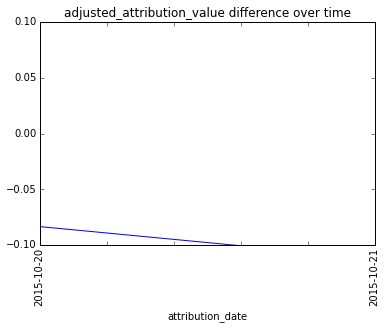

In [497]:
phone_attribution_value = acv.swaplevel(0,2).ix['adjusted_attribution_value'].swaplevel(0,1).groupby(level=[0]).sum()
phone_attribution_value['diff'] = [val for val in phone_attribution_value['diff_abs']/phone_attribution_value['Prev']]
phone_attribution_value['diff'].plot(title='adjusted_attribution_value difference over time', rot=90, ylim= [-0.10, 0.10]) #ylabel='[Navi - Prod]/Prod')

In [307]:
acv.ix['2015-09-29'].swaplevel(0,1).sort_index().sum

<bound method DataFrame.sum of system                                                        Prod     Navi  \
                             page_type                                        
ad_click_count               Attorney_Directory_Browse    2,268.00 2,257.00   
                             Attorney_Directory_Launch        3.00     3.00   
                             Attorney_Profile               438.00   437.00   
                             Attorney_Profile_Aboutme         8.00     8.00   
                             Attorney_Profile_Endorsement     3.00     3.00   
                             Attorney_Profile_Review         76.00    76.00   
                             Attorney_Search                  0.00     0.00   
                             Legal_Answers_Detail           331.00   330.00   
                             Legal_Guides_Detail            257.00   257.00   
                             Legal_KB_Browse                 31.00    31.00   
                     

# Webanalytics - by page_type

In [194]:
acv_navi = pd.read_csv(base_loc + 'page_type_navi.csv')
acv_navi['system'] = 'Navi'
acv_prod = pd.read_csv(base_loc + 'page_type_prod.csv')
acv_prod['system'] = 'Prod'

acv = pd.concat([acv_navi, acv_prod]) #.set_index(['system'])
acv

,page_type,_c1,system
0,Attorney_Directory_Browse,12676,Navi
1,Attorney_Directory_Launch,121,Navi
2,Attorney_Profile,20691,Navi
3,Attorney_Profile_Aboutme,568,Navi
4,Attorney_Profile_Endorsement,615,Navi
5,Attorney_Profile_Review,6045,Navi
6,Attorney_Search,98,Navi
7,Legal_Answers_Detail,30587,Navi
8,Legal_Guides_Detail,9166,Navi
9,Legal_KB_Browse,278,Navi


# Webanalytics - markets

In [263]:
attr_navi = pd.read_csv(base_loc + 'attribution_navi.csv')
attr_navi['system'] = 'Navi'
attr_prod = pd.read_csv(base_loc + 'attribution_prod.csv')
attr_prod['system'] = 'Prod'

attr = pd.concat([attr_navi, attr_prod])
attr.rename(columns={ col:col[(col.find('.') + 1):] for col in attr.columns if col.startswith('weba')}, inplace=True)

attr.set_index(['professional_id', 'ad_market_key', 'ad_id', 'customer_id', 'page_type', 'render_type_key', 'system'], inplace=True)
attr.sort_index(inplace=True)

In [264]:
webass = attr['website_associated_count']
webass = webass.unstack(level=6).fillna(0)
webass['diff'] = webass['Navi'] - webass['Prod']
webass.sort(columns=['diff'], ascending=False , inplace=True)

In [265]:
webass['diff'].value_counts()

0.00     90219
1.00      1250
-1.00      253
2.00        97
-2.00       20
3.00        12
-3.00        2
4.00         2
8.00         1
dtype: int64

In [266]:
webass[webass['diff'] > 0]

,,,,,system,Navi,Prod,diff
professional_id,ad_market_key,ad_id,customer_id,page_type,render_type_key,,,
3333212,104158,54593,381,Attorney_Directory_Browse,1,9.00,1.00,8.00
194105,273299,50715,35852,Attorney_Directory_Browse,1,4.00,0.00,4.00
1745222,123528,39861,24134,Legal_Answers_Detail,2,4.00,0.00,4.00
688399,21027,30516,18965,Attorney_Directory_Browse,1,3.00,0.00,3.00
715903,261363,45071,28665,Attorney_Directory_Browse,2,3.00,0.00,3.00
1362518,2319,44571,28234,Attorney_Profile,1,4.00,1.00,3.00
1424669,435045,50413,3185,Attorney_Profile_Review,3,3.00,0.00,3.00
313922,105892,5421,2852,Attorney_Directory_Browse,1,4.00,1.00,3.00
2059310,438433,16285,2767,Attorney_Directory_Browse,3,3.00,0.00,3.00


In [528]:
a = pd.read_csv(base_loc + 'Jane_LPS2.csv', names=['month', 'lp', 'count'], skiprows=1)

In [529]:
b = a.pivot_table(index='lp', columns='month').T

In [530]:
b['total'] = b.sum(axis=1)
b = b.T

In [531]:
b

count                           
month                                   2015-08      2015-09       2015-10
lp                                                                        
Account_Forgot_Password                  194.00       177.00        217.00
Account_Login                         24,127.00    21,540.00     35,869.00
Account_Notifications                  1,676.00     1,582.00      2,892.00
Account_Register                         397.00       362.00        525.00
Account_Saved_Questions                2,143.00     1,896.00      2,221.00
Account_Saved_Subscriptions               79.00        71.00         51.00
Account_Settings                         137.00       175.00        266.00
Advisor-checkout                            nan          nan        328.00
Advisor-homepage                            nan     5,283.00     18,467.00
Advisor-specialty                           nan        94.00        436.00
Advisor-thankyou                            nan       185.00        228.00
Attorney_Directory_Browse            367,554.00   289,764.00    438,747.00
Attorney_Directory_Launch             19,046.00    17,182.00     37,185.00
Attorney_Profile                   2,405,427.00 2,210,870.00  2,889,389.00
Attorney_Profile_Aboutme               4,401.00     3,918.00      7,443.00
Attorney_Profile_Contact              14,625.00    13,590.00     25,797.00
Attorney_Profile_Endorsement           8,351.00     7,055.00     10,096.00
Attorney_Profile_Review               98,013.00    97,671.00    154,563.00
Attorney_Review                        6,176.00     5,954.00      7,610.00
Attorney_Search                       15,043.00    65,126.00     25,332.00
Homepage                             212,617.00   217,439.00    526,185.00
Legal_Answers_Detail               3,863,370.00 3,639,294.00  4,102,598.00
Legal_Ask_Launch                      19,202.00    18,266.00     18,803.00
Legal_Ask_Preview                      1,761.00     1,627.00      2,340.00
Legal_Guides_Detail                  496,732.00   666,065.00  1,744,858.00
Legal_KB_Browse                        3,847.00     4,052.00      2,758.00
Legal_KB_Launch                       24,322.00    21,177.00     25,305.00
Legal_KB_Search                        8,606.00     6,964.00     12,522.00
Professional_Analytics_Contacts        1,427.00     1,268.00      1,393.00
Professional_Analytics_Impressions     2,305.00     2,012.00      2,475.00
Professional_Dashboard                37,543.00    35,249.00     37,926.00
SEM-Adblock                                 nan          nan         68.00
SEM-Network                                 nan          nan    183,818.00
Support                                6,301.00     5,961.00     24,335.00
Topics                               264,366.00   385,044.00    227,382.00
Unknown                               81,446.00    71,955.00    170,155.00
total                              7,991,234.00 7,818,868.00 10,740,583.00

In [535]:
%%latex
$
p(w \rightarrow \kappa_i)
$

<IPython.core.display.Latex object>

In [547]:
import pandas as pd
import folium
from matplotlib.colors import Normalize, rgb2hex
import matplotlib.cm as cm

In [549]:
data = pd.read_csv('http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_day.csv')
norm = Normalize(data['mag'].min(), data['mag'].max())

map = folium.Map(location=[48, -102], zoom_start=3)
for eq in data.iterrows():
    color = rgb2hex(cm.OrRd(norm(float(eq[1]['mag']))))
    map.circle_marker([eq[1]['latitude'], eq[1]['longitude']], 
                    popup=eq[1]['place'], 
                    radius=20000*float(eq[1]['mag']),
                    line_color=color,
                    fill_color=color)
map.create_map(path='results/earthquake.html')
# need to replace CDN with https URLs
with open('results/earthquake.html', 'r') as f:
    contents = f.read()
    contents = contents.replace("http://cdn.leafletjs.com/leaflet-0.5/", "//cdnjs.cloudflare.com/ajax/libs/leaflet/0.7.7/")
    with open('results/earthquake2.html', 'w') as f:
        f.writelines(contents)

In [550]:
%%HTML
<iframe width="100%" height="350" src="https://app.dominodatalab.com/r00sj3/jupyter/raw/latest/results/earthquake2.html?inline=true"></iframe>